In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bioframe
from hmmlearn import hmm

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Read 4C data and TetO coordinates

In [2]:
teto_coordinates = pd.read_csv('C17_TetO_locations_manual_TACL_domains.txt', sep = '\t')
teto_coordinates

chrom      start        end  teto_id  domain_small_start  \
0    chr3   33400162   33400162        1            32943025   
1   chr17   19456127   19456127        2            19355266   
2    chr1  237830986  237830986        3           237543776   
3   chr18   47931745   47931745        4            47083150   
4    chr8   65550156   65550156        5            64245069   
5    chrX  132481644  132481644        6           131818350   
6   chr15   57387420   57387420        7            56475772   
7   chr18   56634609   56634609        8            55220048   
8   chr13   62507506   62507506        9            61998648   
9    chr3   53376827   53376827       10            52836280   
10   chr9   34072804   34072804       11            33399410   
11  chr10   62024612   62024612       12            60415583   
12  chr11   96193977   96193977       13            94590528   
13   chr7   75997722   75997722       14            75621917   
14   chr8  115112796  115112796       15           112739644   
15   chr5  129667933  129667933       16           127529161   
16   chr4  110494148  110494148       17           109973176   
17  chr18   76494438   76494438       18            76331780   
18   chr4  111934793  111934793       19           111222350   
19  chr20   51962227   51962227       20            50953871   
20   chr6   66566401   66566401       21            63906217   
21  chr19   29771361   29771361       22            29586109   
22  chr16   59121753   59121753       23            58800386   
23  chr10  126191388  126191388       24           125852661   
24  chr17   42841554   42841554       25            42308491   
25   chr2   51872342   51872342       26            50462955   
26   chr5   34372940   34372940       27            33359399   

    domain_small_end  domain_large_start  domain_large_end  
0           33896603            29979716          37412478  
1           20333029            17348282          22822656  
2          240050358           233321503         242063930  
3           48559650            43557896          51704212  
4           66639209            61012154          69728571  
5          133683961           129575808         135755620  
6           58207686            52715626          60601088  
7           57578323            51704212          59406794  
8           67308741            57596900          69617134  
9           54878435            50592396          57444215  
10          34704583            27714476          36481353  
11          63826223            58290142          66196285  
12          96486790            90128970         102092761  
13          76350844            73413021          79406279  
14         117368368           109699014         119921893  
15         129793198           126226196         133737949  
16         111222350           106188418         111149888  
17          77020694            70445945          79143916  
18         112341730           111149888         114907212  
19          53576806            49246010          57394149  
20          68367951            60661449          71063266  
21          30720189            27250396          33803911  
22          62205719            55455287          65198871  
23         128224355           122252499         132165535  
24          42940238            40585881          44222122  
25          53918807            47740578          56256546  
26          36013586            30027098          38243934

In [3]:
vp_data_merged = pd.read_csv('4C_data_TACL_domains_HMM.txt', sep = '\t')
vp_data_merged

chrom     start       end         mid  teto_id  norm_MAU2  norm_mCherry
0       chr3  23400574  23400660  23400617.0        1   3.386276     11.694652
1       chr3  23400871  23401212  23401041.5        1   3.362760     13.334756
2       chr3  23402320  23402344  23402332.0        1   3.104086     12.309005
3       chr3  23402464  23402607  23402535.5        1   2.882366     11.653904
4       chr3  23402604  23402743  23402673.5        1   2.690208     10.876977
...      ...       ...       ...         ...      ...        ...           ...
662746  chr5  44367977  44368490  44368233.5       27   2.660242     11.028398
662747  chr5  44368626  44368772  44368699.0       27   2.850259     11.816141
662748  chr5  44370418  44370843  44370630.5       27   3.069510     12.725075
662749  chr5  44372335  44372650  44372492.5       27   3.325303     13.785498
662750  chr5  44372647  44372944  44372795.5       27   3.627603     15.038725

[662751 rows x 7 columns]

## Plot 4C profiles and manually defined TACL domains

In [4]:
def plot_viewpoint_4C(viewpoint_data, viewpoint_id, teto_coordinates):
    plt.figure(figsize = (15, 3))
    plt.title('TetO #' + str(viewpoint_id) + ', ' + ':'.join([str(x) for x in teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id].values[0][:2]]))
    plt.plot(viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['mid'], viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['norm_MAU2'],
             label = 'T-MAU2', color = 'C0')
    plt.plot(viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['mid'], viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['norm_mCherry'],
             label = 'T-mCherry', color = 'C3')
    plt.axvline(teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['domain_small_start'].values[0],
                color = 'k', ls = '--', label = 'manual TACL domain')
    plt.axvline(teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['domain_small_end'].values[0],
                color = 'k', ls = '--')
    plt.xlim((teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['domain_large_start'].values[0],
              teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['domain_large_end'].values[0]))
    plt.ylim((0, 1000))
    plt.legend(loc = 'upper right')
    plt.show()

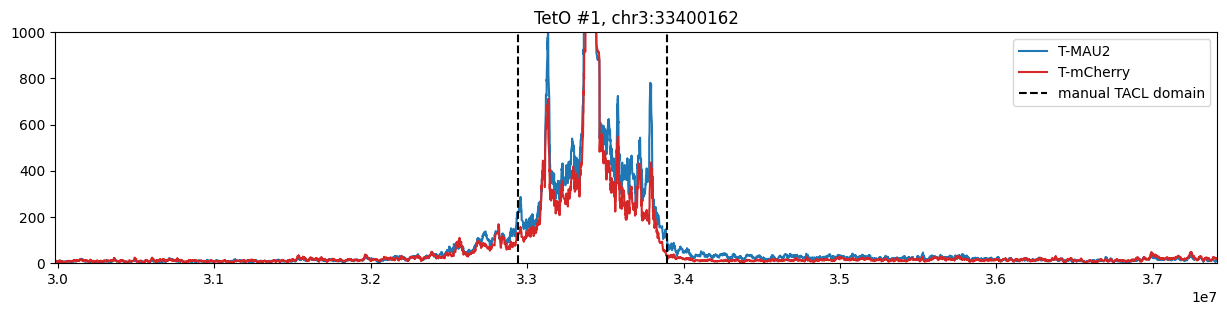

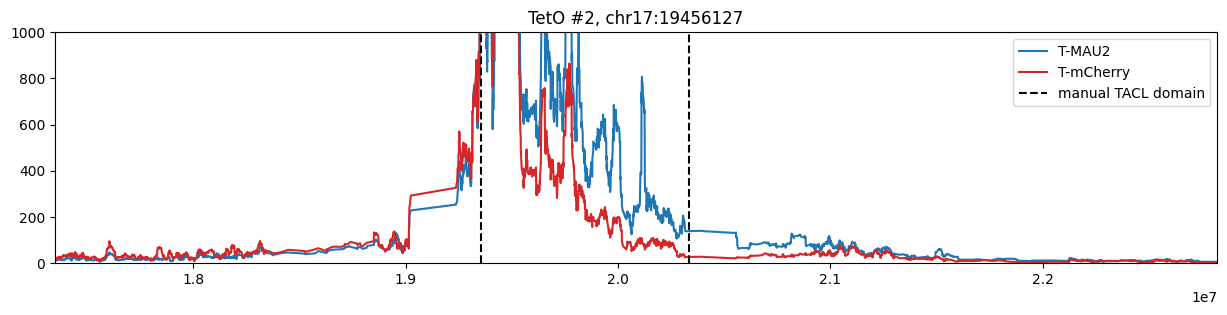

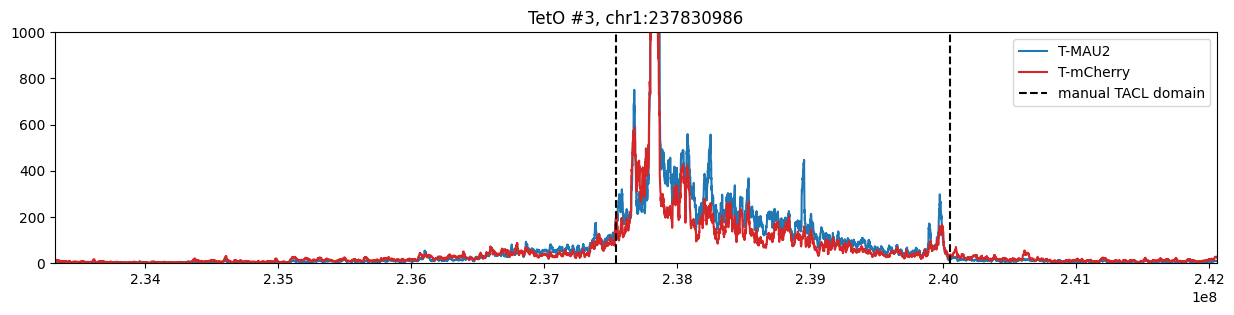

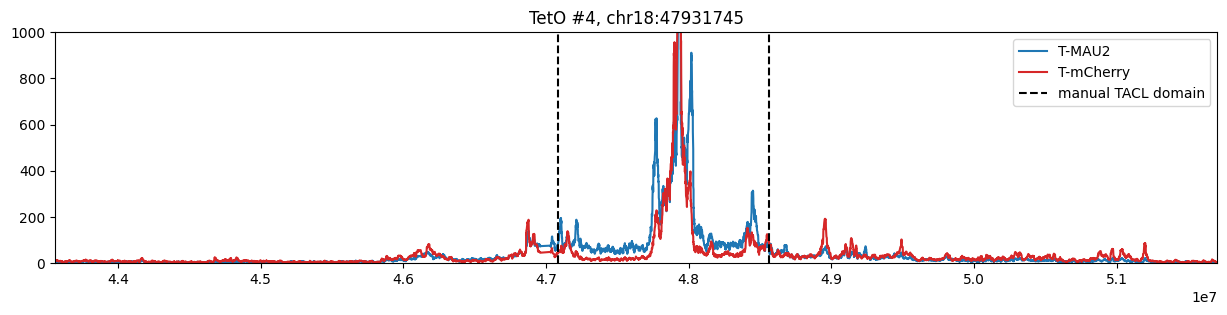

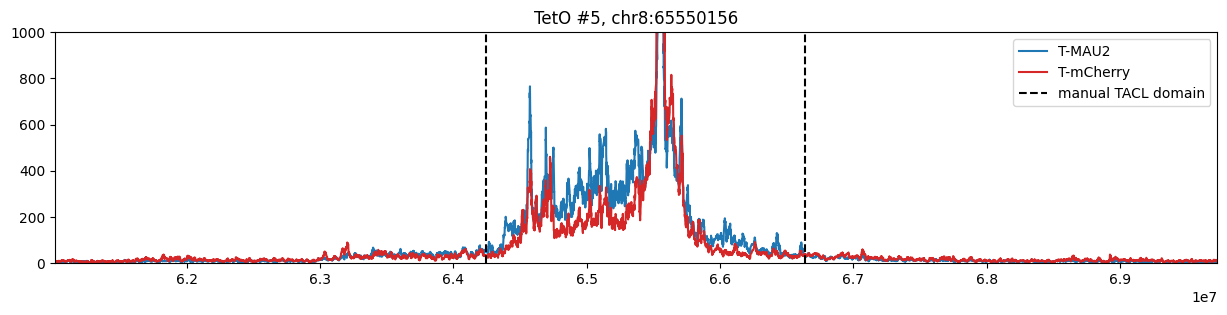

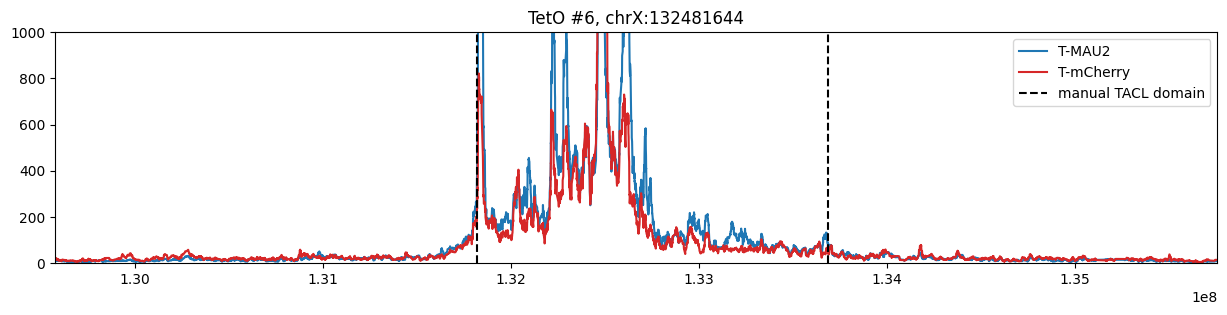

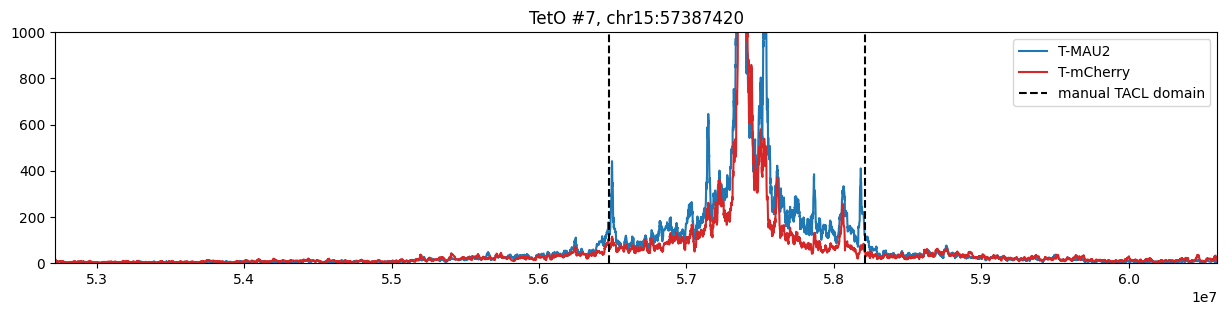

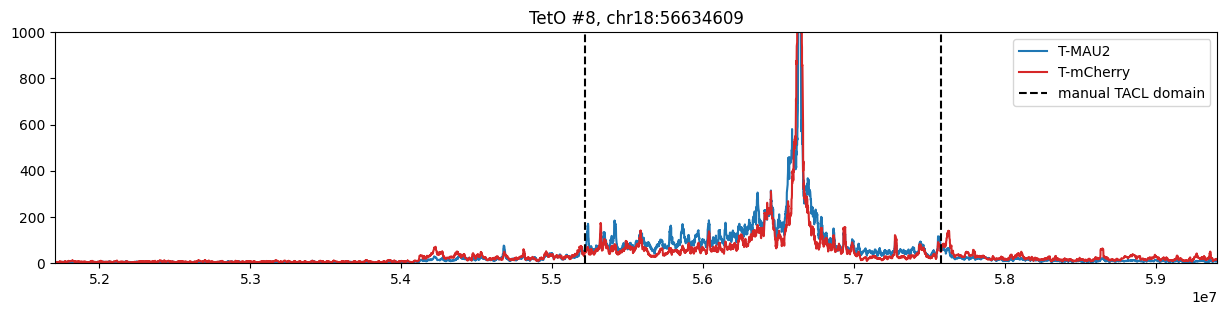

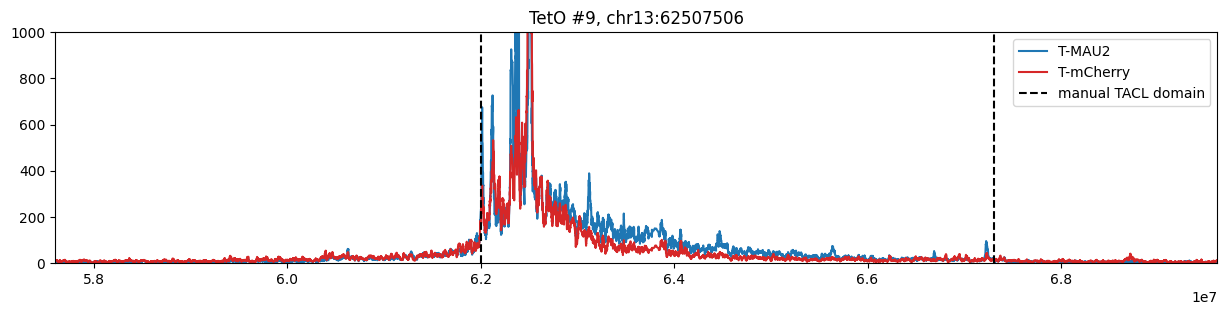

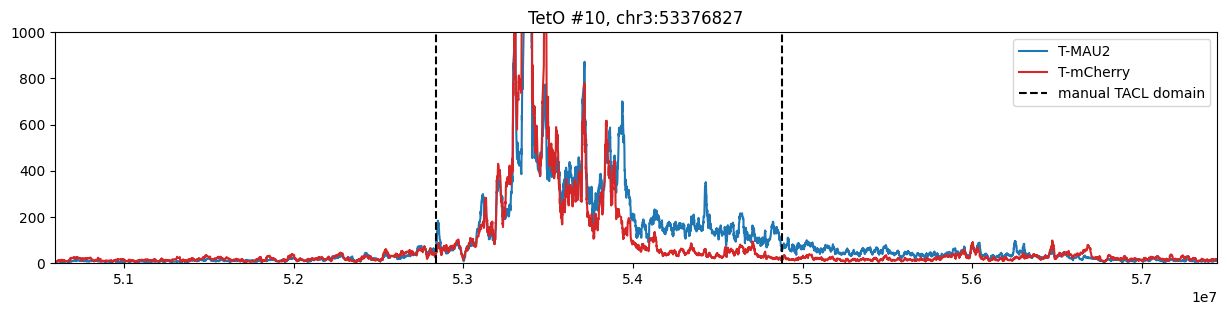

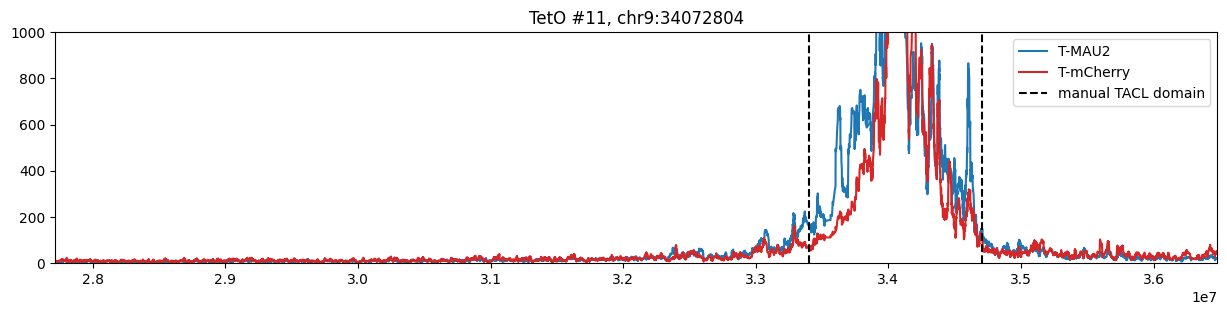

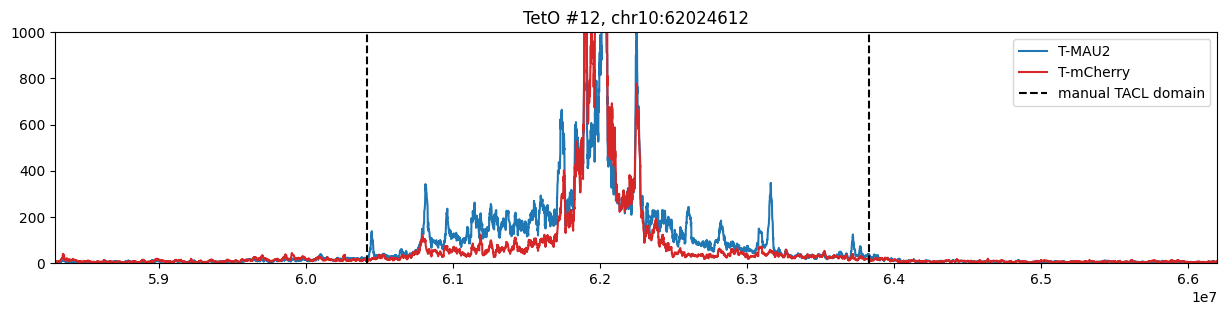

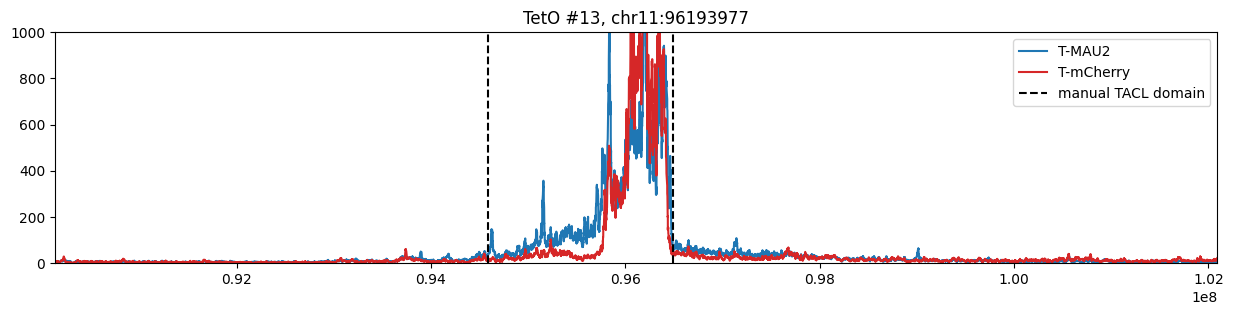

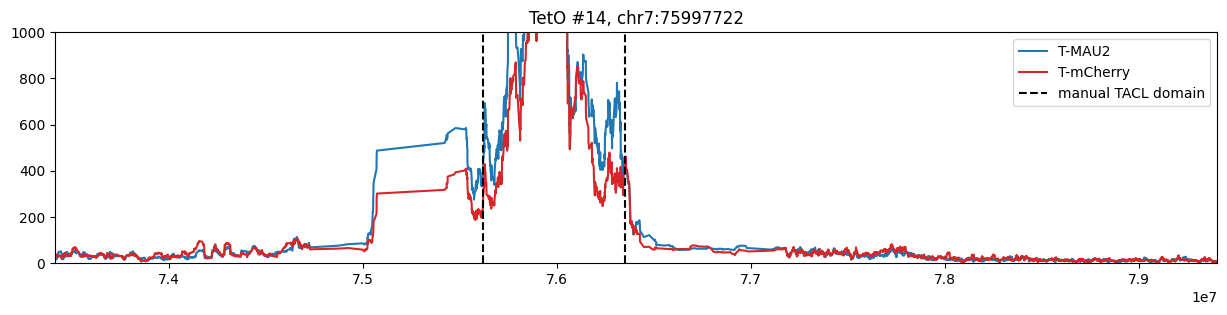

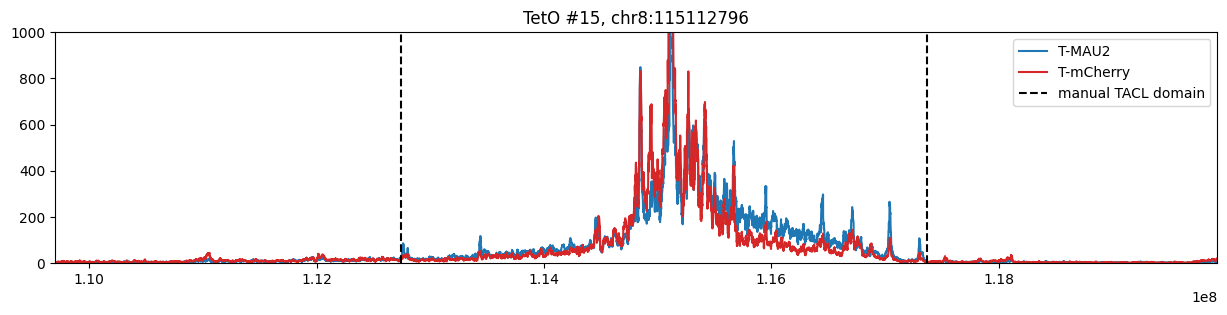

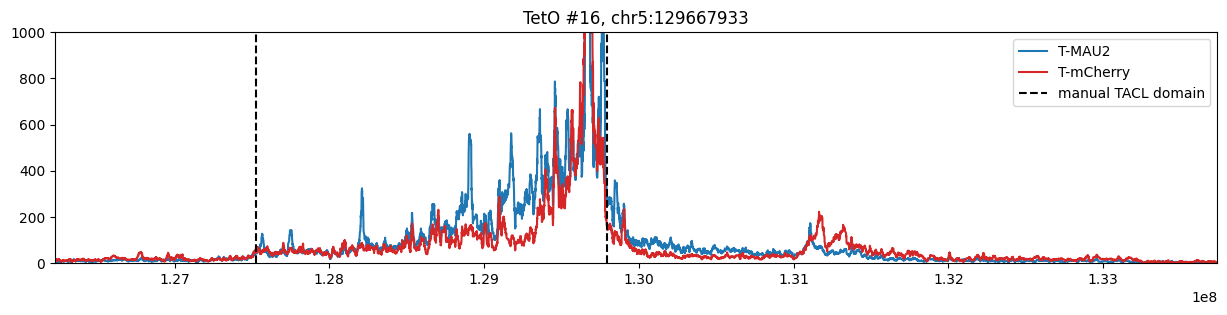

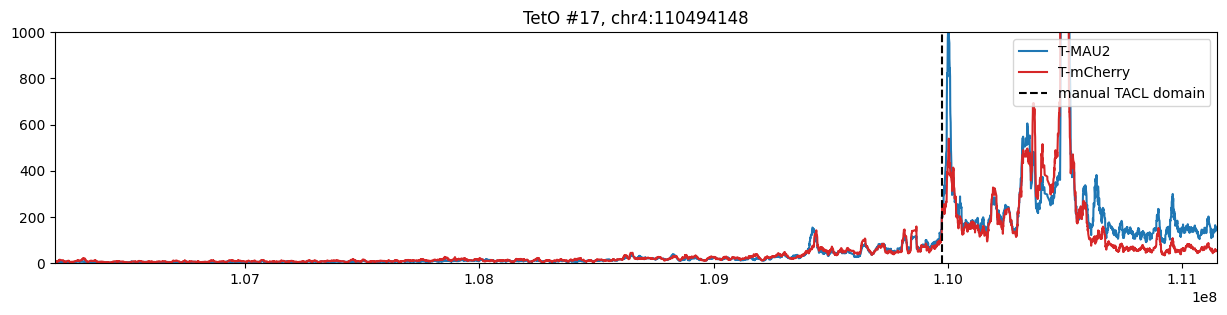

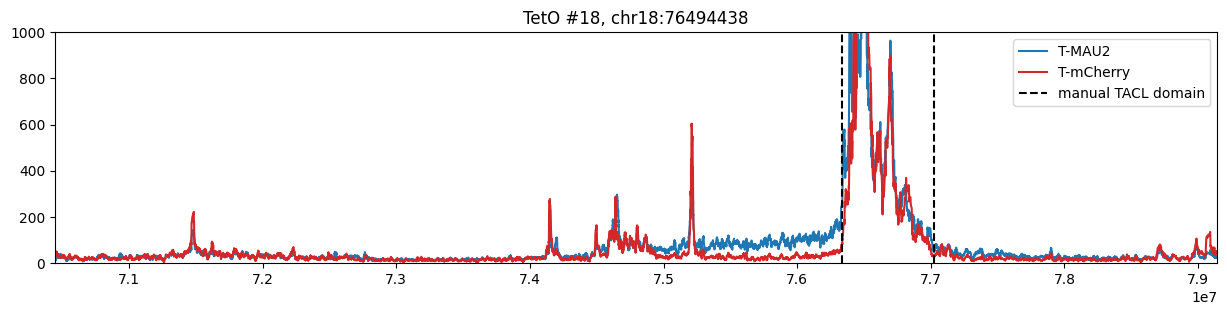

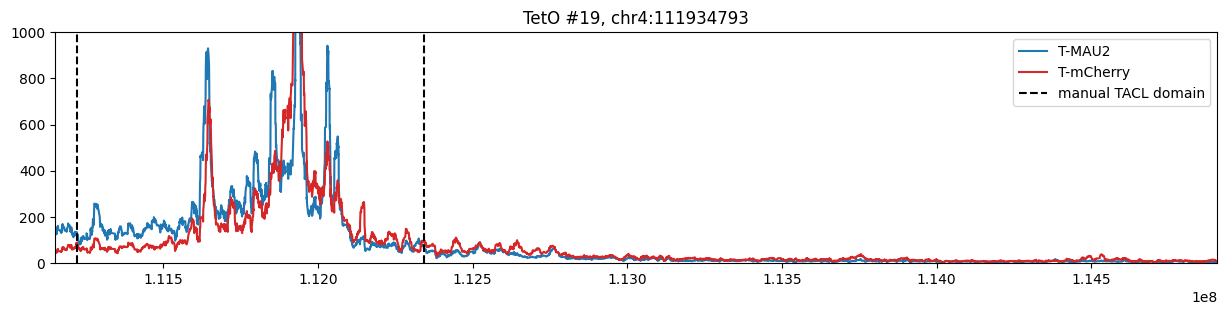

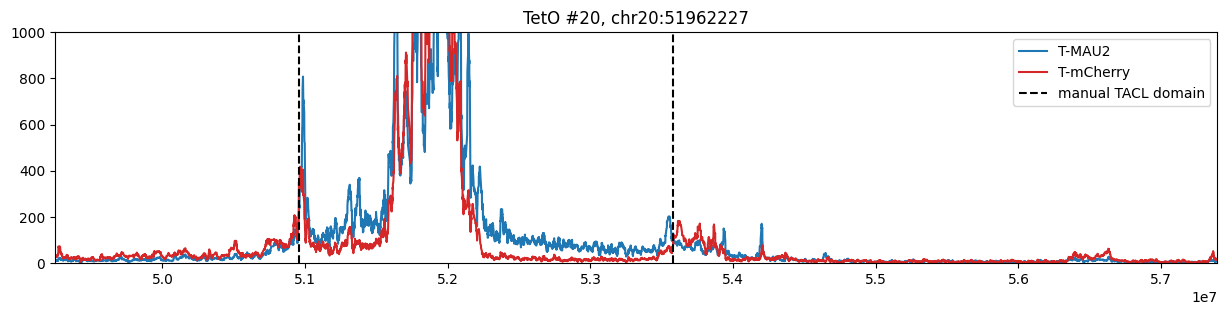

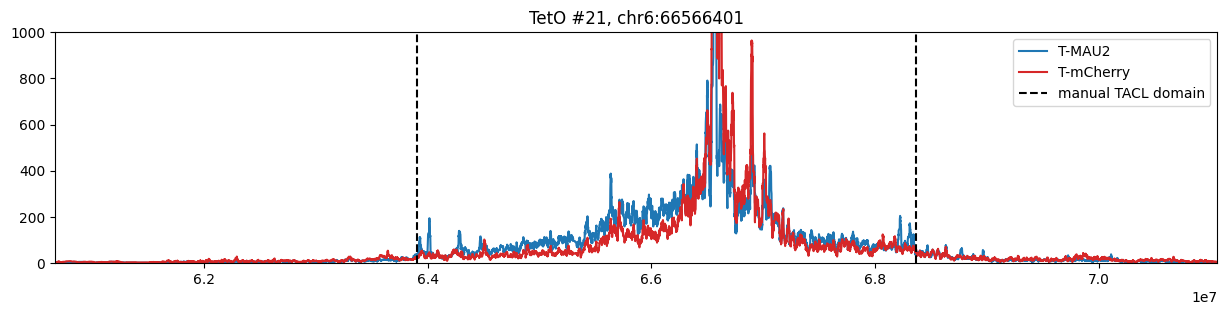

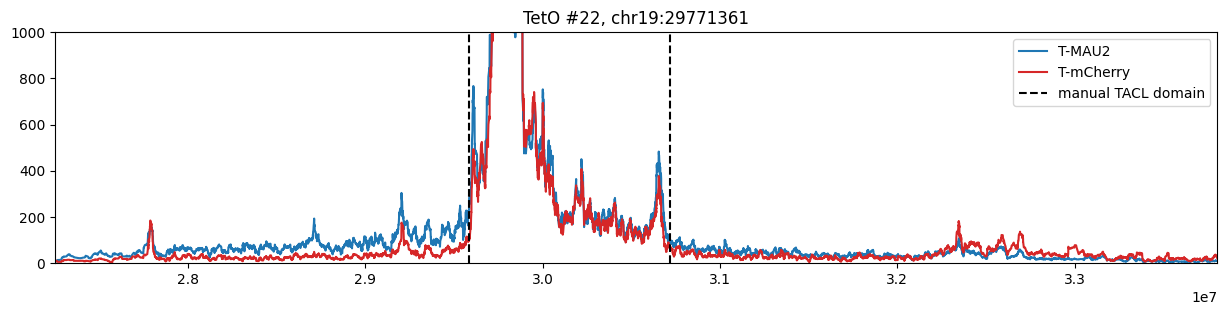

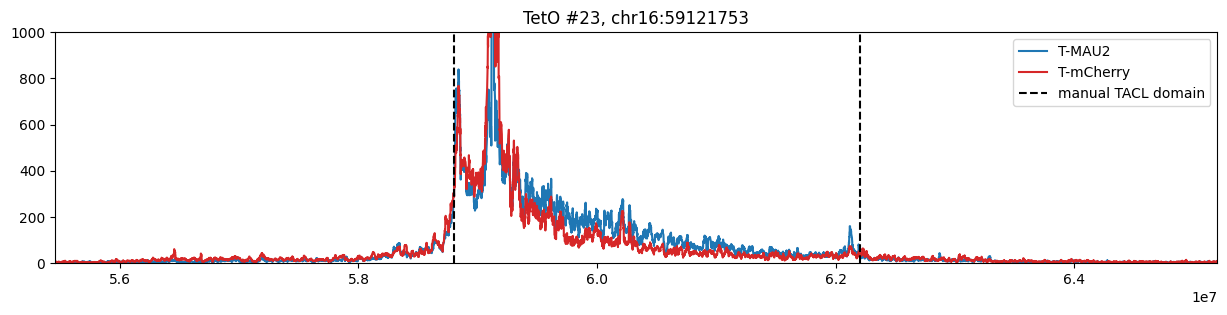

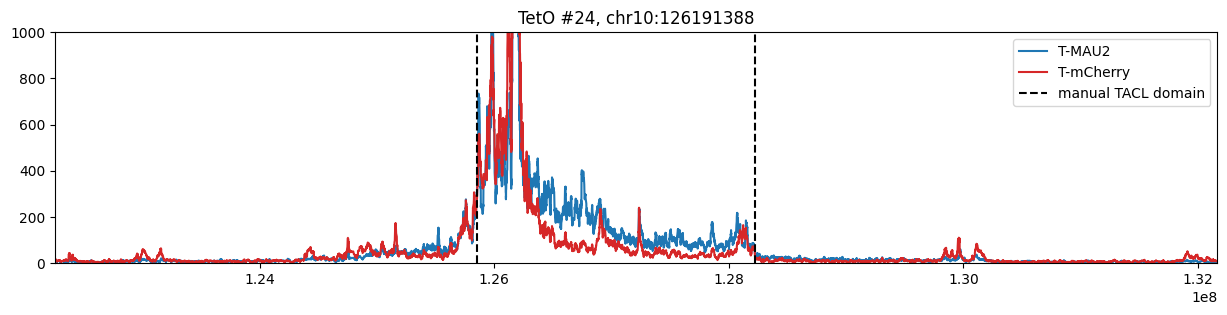

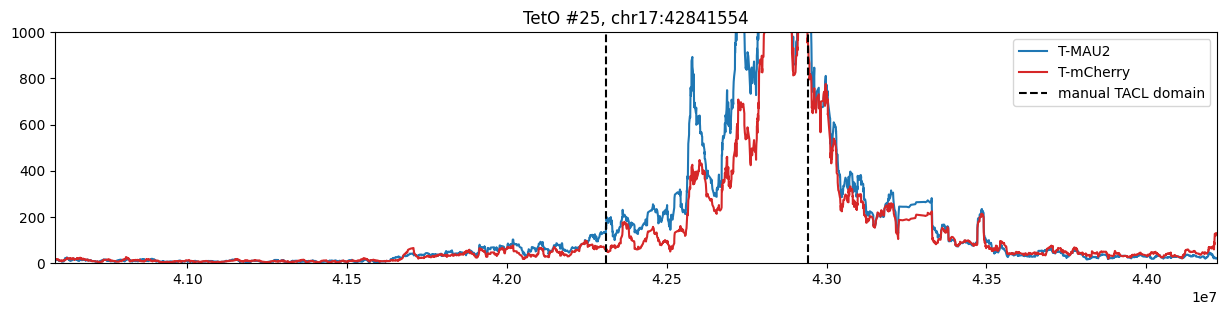

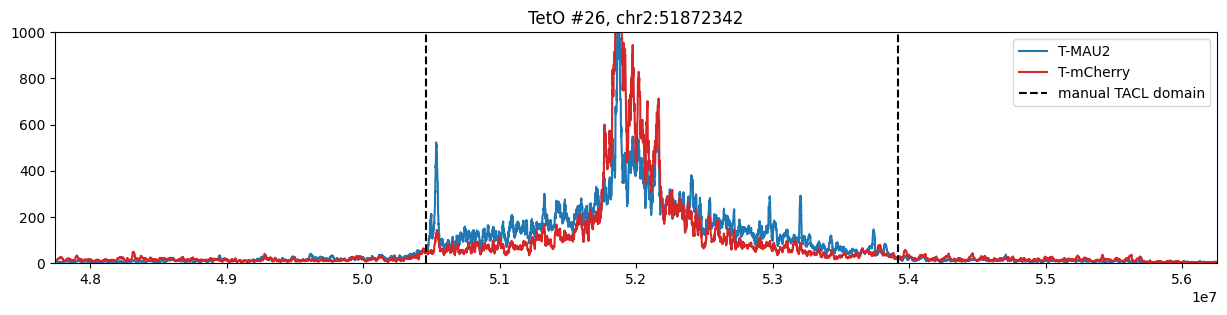

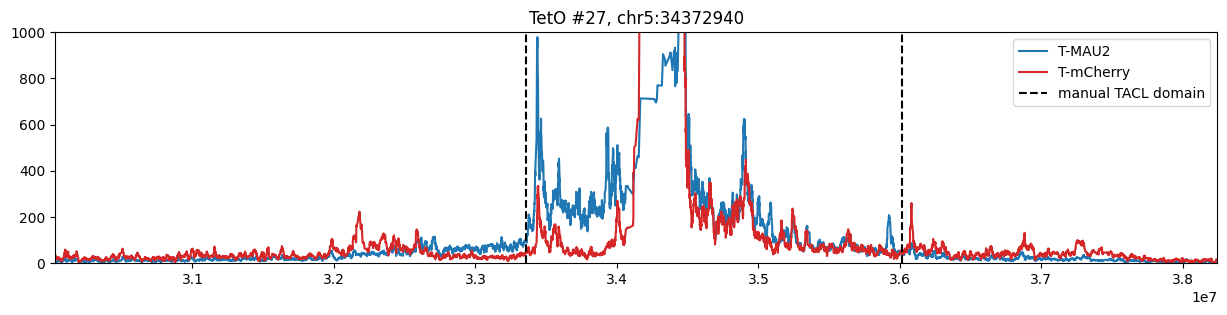

In [5]:
for vp_id in range(1, 28):
    plot_viewpoint_4C(vp_data_merged, vp_id, teto_coordinates)

## Annotate TACL domains

### Estimate model parameters

In [6]:
# Estimate HMM parameters based on manually defined TACL domains by. overlapping them with restriction fragments
small_domains = teto_coordinates[['chrom', 'domain_small_start', 'domain_small_end']]
small_domains.columns = ['chrom', 'start', 'end']

overlap_small_domains = bioframe.overlap(vp_data_merged, small_domains)
signal_inside_small_domains = overlap_small_domains.dropna()
signal_outside_small_domains = overlap_small_domains[overlap_small_domains.isnull().any(axis=1)]

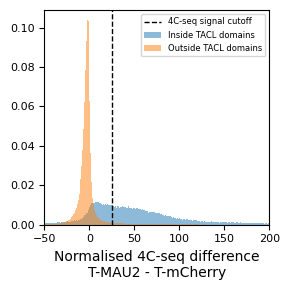

In [12]:
estimated_cutoff = 25

plt.figure(figsize = (3, 3))
plt.hist(signal_inside_small_domains['norm_MAU2'] - signal_inside_small_domains['norm_mCherry'],
         range = (-50, 200), density = 1, bins = 250, alpha = 0.5, label = 'Inside TACL domains')
plt.hist(signal_outside_small_domains['norm_MAU2'] - signal_outside_small_domains['norm_mCherry'],
         range = (-50, 200), density = 1,  bins = 250, alpha = 0.5, label = 'Outside TACL domains')
plt.xlabel('Normalised 4C-seq difference\nT-MAU2 - T-mCherry', fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.axvline(estimated_cutoff, color = 'k', ls = '--', lw = 1, label = '4C-seq signal cutoff')
plt.xlim((-50, 200))
plt.legend(fontsize = 6)
plt.tight_layout()
plt.show()

In [13]:
prob_tacl_domain = sum(signal_inside_small_domains['norm_MAU2'] - signal_inside_small_domains['norm_mCherry'] >= estimated_cutoff)/len(signal_inside_small_domains)
prob_no_domain = sum(signal_outside_small_domains['norm_MAU2'] - signal_outside_small_domains['norm_mCherry'] >= estimated_cutoff)/len(signal_outside_small_domains)
emission_matrix = np.array([[prob_tacl_domain, 1-prob_tacl_domain],
                            [prob_no_domain, 1-prob_no_domain]])
print('Estimated emission matrix:\n', emission_matrix)

Estimated emission matrix:
 [[0.60166706 0.39833294]
 [0.01994205 0.98005795]]


### Define HMM model parameters and filter parameters

In [14]:
# Set HMM parameters
cutoff = 25
print('Delta signal cutoff:', cutoff)

prob_tacl_domain = 0.60
prob_no_domain = 0.02
emission_matrix = np.array([[prob_tacl_domain, 1-prob_tacl_domain],
                            [prob_no_domain, 1-prob_no_domain]])
print('\nEmission matrix:\n', emission_matrix)

transition = 0.000001
transition_matrix = np.array([[1-transition, transition],
                              [transition, 1-transition]])
print('\nTransition matrix:\n', transition_matrix)

consecutive_threshold = 20
print('\nConsecutive HMM calls threshold:', consecutive_threshold)

merge_distance_restriction_fragments = 100000
number_restriction_fragments = 40
merge_distance_hmm_domains = 1500000
print('\nMerge distance clustering restriction fragments :', merge_distance_restriction_fragments)
print('Minimal number of restriction fragments to keep clusters:', number_restriction_fragments)
print('Merge distance calling domains:', merge_distance_hmm_domains)

Delta signal cutoff: 25

Emission matrix:
 [[0.6  0.4 ]
 [0.02 0.98]]

Transition matrix:
 [[9.99999e-01 1.00000e-06]
 [1.00000e-06 9.99999e-01]]

Consecutive HMM calls threshold: 20

Merge distance clustering restriction fragments : 100000
Minimal number of restriction fragments to keep clusters: 40
Merge distance calling domains: 1500000


In [15]:
# Define HMM model for calling TACL domains
tacl_domains_model = hmm.CategoricalHMM(n_components = 2, random_state = 99, init_params = '')

# Initialise with estimated parameters
tacl_domains_model.transmat_ = transition_matrix
tacl_domains_model.emissionprob_ = emission_matrix
tacl_domains_model.startprob_ = np.array([1.0, 0.0])
tacl_domains_model

CategoricalHMM(init_params='', n_components=2, random_state=99)

### Call HMM states

In [16]:
# Call domain states for all viewpoints
def get_binary_observations(viewpoint_id, cutoff):
    observations = vp_data_merged[vp_data_merged['teto_id'] == viewpoint_id]
    deltas = observations['norm_MAU2'] - observations['norm_mCherry']
    binary_deltas = [[1] if d > cutoff else [0] for d in deltas]
    return(binary_deltas)

hmm_states_tacl_domains = []
for viewpoint_id_hmm in range(1, 28):
    binary_signal_difference = get_binary_observations(viewpoint_id_hmm, cutoff)
    tacl_domains_model.fit(binary_signal_difference)
    hmm_results = tacl_domains_model.predict(binary_signal_difference)
    hmm_states_tacl_domains = hmm_states_tacl_domains + list(hmm_results)
    
vp_data_merged['hmm_state'] = hmm_states_tacl_domains
vp_data_merged

chrom     start       end         mid  teto_id  norm_MAU2  \
0       chr3  23400574  23400660  23400617.0        1   3.386276   
1       chr3  23400871  23401212  23401041.5        1   3.362760   
2       chr3  23402320  23402344  23402332.0        1   3.104086   
3       chr3  23402464  23402607  23402535.5        1   2.882366   
4       chr3  23402604  23402743  23402673.5        1   2.690208   
...      ...       ...       ...         ...      ...        ...   
662746  chr5  44367977  44368490  44368233.5       27   2.660242   
662747  chr5  44368626  44368772  44368699.0       27   2.850259   
662748  chr5  44370418  44370843  44370630.5       27   3.069510   
662749  chr5  44372335  44372650  44372492.5       27   3.325303   
662750  chr5  44372647  44372944  44372795.5       27   3.627603   

        norm_mCherry  hmm_state  
0          11.694652          0  
1          13.334756          0  
2          12.309005          0  
3          11.653904          0  
4          10.876977          0  
...              ...        ...  
662746     11.028398          0  
662747     11.816141          0  
662748     12.725075          0  
662749     13.785498          0  
662750     15.038725          0  

[662751 rows x 8 columns]

In [17]:
# Keep restriction fragments withing consecutive HMM state calls
def calculate_intervals_from_range(list_range):
    list_range = list(list_range)
    intervals = []
    for idx, item in enumerate(list_range):
        if not idx or item-1 != intervals[-1][-1]:
            intervals.append([item])
        else:
            intervals[-1].append(item)
    return(intervals)

hmm_state_intervals = calculate_intervals_from_range(vp_data_merged[vp_data_merged['hmm_state'] == 1].index)
hmm_state_intervals_confident = [x for x in hmm_state_intervals if len(x) >= consecutive_threshold]
hmm_state_intervals_confident = [item for items in hmm_state_intervals_confident for item in items]
hmm_state_intervals_confident = np.unique(hmm_state_intervals_confident)

hmm_states_tacl_domains_confident = [1 if x in hmm_state_intervals_confident else 0 for x in np.arange(len(vp_data_merged))]
vp_data_merged['hmm_state_confident'] = hmm_states_tacl_domains_confident
vp_data_merged

chrom     start       end         mid  teto_id  norm_MAU2  \
0       chr3  23400574  23400660  23400617.0        1   3.386276   
1       chr3  23400871  23401212  23401041.5        1   3.362760   
2       chr3  23402320  23402344  23402332.0        1   3.104086   
3       chr3  23402464  23402607  23402535.5        1   2.882366   
4       chr3  23402604  23402743  23402673.5        1   2.690208   
...      ...       ...       ...         ...      ...        ...   
662746  chr5  44367977  44368490  44368233.5       27   2.660242   
662747  chr5  44368626  44368772  44368699.0       27   2.850259   
662748  chr5  44370418  44370843  44370630.5       27   3.069510   
662749  chr5  44372335  44372650  44372492.5       27   3.325303   
662750  chr5  44372647  44372944  44372795.5       27   3.627603   

        norm_mCherry  hmm_state  hmm_state_confident  
0          11.694652          0                    0  
1          13.334756          0                    0  
2          12.309005          0                    0  
3          11.653904          0                    0  
4          10.876977          0                    0  
...              ...        ...                  ...  
662746     11.028398          0                    0  
662747     11.816141          0                    0  
662748     12.725075          0                    0  
662749     13.785498          0                    0  
662750     15.038725          0                    0  

[662751 rows x 9 columns]

### Define TACL domains

In [18]:
# Define TACL domains by stitching together consecutive regions with the same state
tacl_domain_start, tacl_domain_end = [], []
for viewpoint_id_hmm in range(1, 28):
    vp_hmm_results = vp_data_merged[vp_data_merged['teto_id'] == viewpoint_id_hmm]
    
    # Merge restriction fragments from TACL domain state within 100kb from each other
    draft_tacl_domain_small = bioframe.merge(vp_hmm_results[vp_hmm_results['hmm_state_confident'] == 1], 
                                             min_dist = merge_distance_restriction_fragments)
    # Retain merged regions with at least 40 restriction fragments and further merge them within 1.5Mb distance
    draft_tacl_domain_large = bioframe.merge(draft_tacl_domain_small[draft_tacl_domain_small['n_intervals'] >= number_restriction_fragments], 
                                             min_dist = merge_distance_hmm_domains)

    # Overlap with TetO coordinates to avoid confusion when two platforms are close to each other
    called_tacl_domain = bioframe.overlap(draft_tacl_domain_large, teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id_hmm]).dropna()
    # If TetO is outside of called TACL domain, find nearest domains on both sides and stitch them to include TetO
    if len(called_tacl_domain) == 0:
        closest_small_tacl_domains = bioframe.closest(draft_tacl_domain_small, teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id_hmm], suffixes=('', '_teto'))
        closest_small_tacl_domains['abs_distance'] = (closest_small_tacl_domains['start'] + closest_small_tacl_domains['end'])/2 - closest_small_tacl_domains['start_teto']
        closest_right = closest_small_tacl_domains[closest_small_tacl_domains['abs_distance']>0].sort_values('distance').values[0][:4]
        closest_left = closest_small_tacl_domains[closest_small_tacl_domains['abs_distance']<0].sort_values('distance').values[0][:4]

        draft_tacl_domain_large_extended = (pd.DataFrame(list(draft_tacl_domain_large.values) + [list(closest_right), list(closest_left)]))
        draft_tacl_domain_large_extended.columns = ['chrom', 'start', 'end', 'n_intervals']
        draft_tacl_domain_large_extended = bioframe.merge(draft_tacl_domain_large_extended, min_dist = merge_distance_hmm_domains)
        
        called_tacl_domain = bioframe.overlap(draft_tacl_domain_large_extended, teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id_hmm]).dropna()
    else:
        pass

    tacl_domain_start.append(called_tacl_domain.values[0][1])
    tacl_domain_end.append(called_tacl_domain.values[0][2])
    
teto_coordinates['tacl_domain_start'] = tacl_domain_start
teto_coordinates['tacl_domain_end'] = tacl_domain_end
teto_coordinates

chrom      start        end  teto_id  domain_small_start  \
0    chr3   33400162   33400162        1            32943025   
1   chr17   19456127   19456127        2            19355266   
2    chr1  237830986  237830986        3           237543776   
3   chr18   47931745   47931745        4            47083150   
4    chr8   65550156   65550156        5            64245069   
5    chrX  132481644  132481644        6           131818350   
6   chr15   57387420   57387420        7            56475772   
7   chr18   56634609   56634609        8            55220048   
8   chr13   62507506   62507506        9            61998648   
9    chr3   53376827   53376827       10            52836280   
10   chr9   34072804   34072804       11            33399410   
11  chr10   62024612   62024612       12            60415583   
12  chr11   96193977   96193977       13            94590528   
13   chr7   75997722   75997722       14            75621917   
14   chr8  115112796  115112796       15           112739644   
15   chr5  129667933  129667933       16           127529161   
16   chr4  110494148  110494148       17           109973176   
17  chr18   76494438   76494438       18            76331780   
18   chr4  111934793  111934793       19           111222350   
19  chr20   51962227   51962227       20            50953871   
20   chr6   66566401   66566401       21            63906217   
21  chr19   29771361   29771361       22            29586109   
22  chr16   59121753   59121753       23            58800386   
23  chr10  126191388  126191388       24           125852661   
24  chr17   42841554   42841554       25            42308491   
25   chr2   51872342   51872342       26            50462955   
26   chr5   34372940   34372940       27            33359399   

    domain_small_end  domain_large_start  domain_large_end  tacl_domain_start  \
0           33896603            29979716          37412478           32710370   
1           20333029            17348282          22822656           19348155   
2          240050358           233321503         242063930          237514789   
3           48559650            43557896          51704212           46949582   
4           66639209            61012154          69728571           64261002   
5          133683961           129575808         135755620          131792264   
6           58207686            52715626          60601088           56391142   
7           57578323            51704212          59406794           55225594   
8           67308741            57596900          69617134           61946766   
9           54878435            50592396          57444215           52839308   
10          34704583            27714476          36481353           33029718   
11          63826223            58290142          66196285           60428007   
12          96486790            90128970         102092761           94593974   
13          76350844            73413021          79406279           75421996   
14         117368368           109699014         119921893          114152551   
15         129793198           126226196         133737949          128193307   
16         111222350           106188418         111149888          109981030   
17          77020694            70445945          79143916           74541535   
18         112341730           111149888         114907212          109981030   
19          53576806            49246010          57394149           50973223   
20          68367951            60661449          71063266           63917202   
21          30720189            27250396          33803911           27750204   
22          62205719            55455287          65198871           58801619   
23         128224355           122252499         132165535          125374115   
24          42940238            40585881          44222122           42017995   
25          53918807            47740578          56256546           50473017   
26          36013586    

In [19]:
teto_coordinates[['chrom', 'tacl_domain_start', 'tacl_domain_end', 'teto_id']].to_csv('TACL_domains_HMM.bed', sep = '\t', header = None, index = None)

### Plot TACL domains

In [21]:
def plot_tacl_domains(viewpoint_data, viewpoint_id, teto_coordinates, flanking_region):
    plt.figure(figsize = (18, 3))
    plt.title('TetO #' + str(viewpoint_id) + ', ' + ':'.join([str(x) for x in teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id].values[0][:2]]))
    
    # Plot 4C profiles
    plt.fill_between(viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['mid'],
                     0,
                     [min(x) for x in viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id][['norm_MAU2', 'norm_mCherry']].values],
                     color = '#CCCCCC')
    
    mask_index = viewpoint_data[(viewpoint_data['teto_id'] == viewpoint_id) & (viewpoint_data['norm_MAU2']-viewpoint_data['norm_mCherry']>0)].index
    mask_bool = [1 if x in mask_index else 0 for x in viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id].index]
    plt.fill_between(viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['mid'],
                     viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['norm_MAU2'],
                     viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['norm_mCherry'],
                     where = mask_bool, color = 'C0', label = 'T-MAU2')
    
    mask_index = vp_data_merged[(vp_data_merged['teto_id'] == viewpoint_id) & (vp_data_merged['norm_MAU2']-vp_data_merged['norm_mCherry']<0)].index
    mask_bool = [1 if x in mask_index else 0 for x in viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id].index]
    plt.fill_between(viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['mid'],
                     viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['norm_MAU2'],
                     viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['norm_mCherry'],
                     where = mask_bool, color = 'C3', label = 'T-mCherry')
    
    # Plot all HMM calls
    #plt.scatter(viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['mid'], viewpoint_data[viewpoint_data['teto_id'] == viewpoint_id]['hmm_state_confident']*999,
    #         label = 'HMM', color = 'k')
    
    # Plot TACL domains
    plt.fill_betweenx(np.arange(1000), 
                      teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['tacl_domain_start'].values[0], 
                      teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['tacl_domain_end'].values[0],
                      color = 'orange', alpha = 0.25, zorder = 3, label = 'HMM TACL domain')
    plt.axvline(teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['tacl_domain_start'].values[0], color = 'orange', alpha = 0.25, zorder = 3)
    plt.axvline(teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['tacl_domain_end'].values[0], color = 'orange', alpha = 0.25, zorder = 3)
    
    plt.axvline(teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['start'].values[0], color = 'k', label = 'TetO integration')
    
    #plt.axvline(teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['domain_small_start'].values[0], color = 'green', label = 'small domain')
    #plt.axvline(teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['domain_small_end'].values[0], color = 'green')
    
    plt.xlim((teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['tacl_domain_start'].values[0]-flanking_region,
              teto_coordinates[teto_coordinates['teto_id'] == viewpoint_id]['tacl_domain_end'].values[0]+flanking_region))
    plt.ylim((0, 1000))
    plt.legend()
    plt.show()

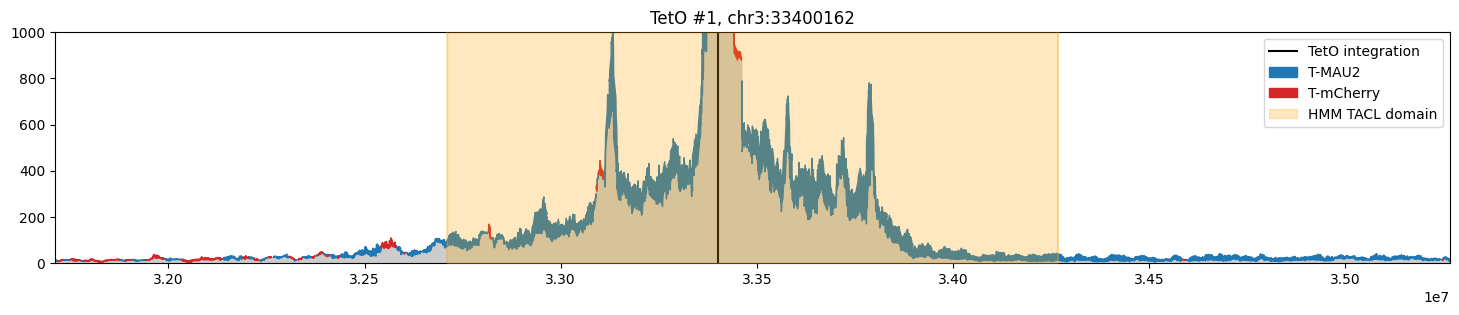

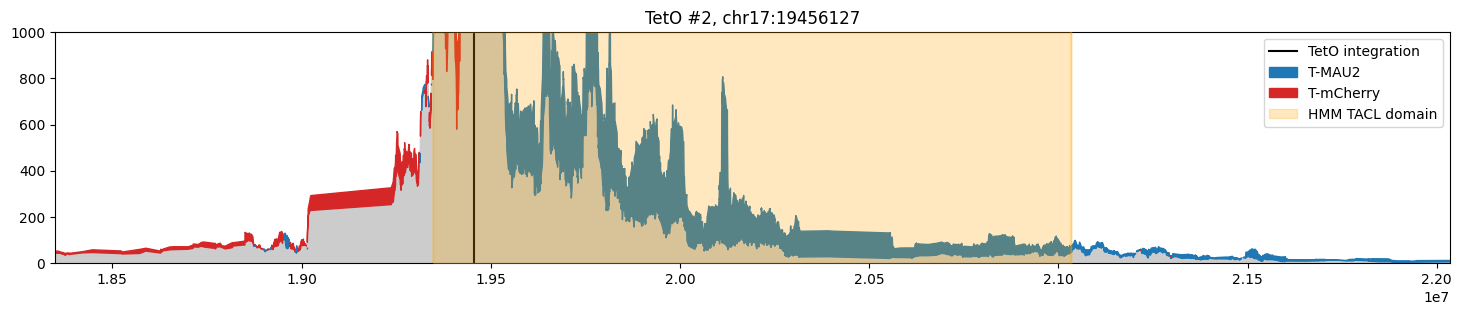

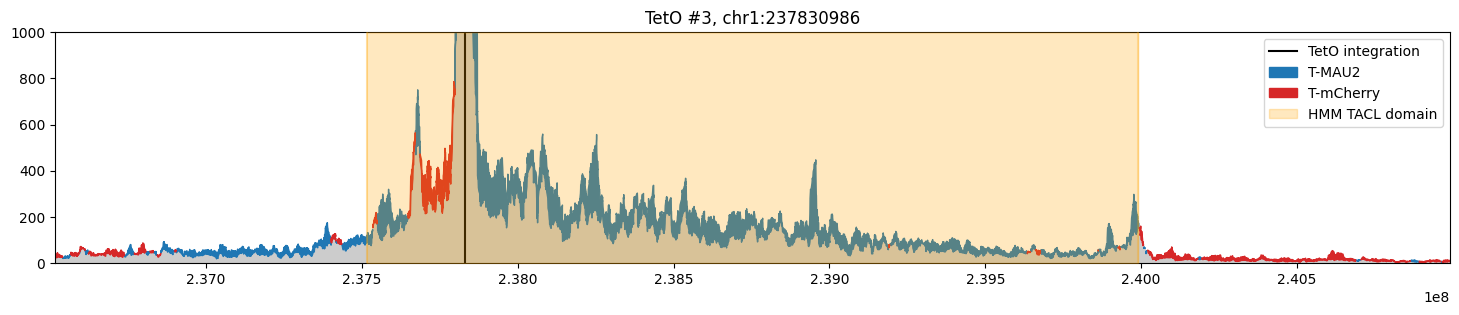

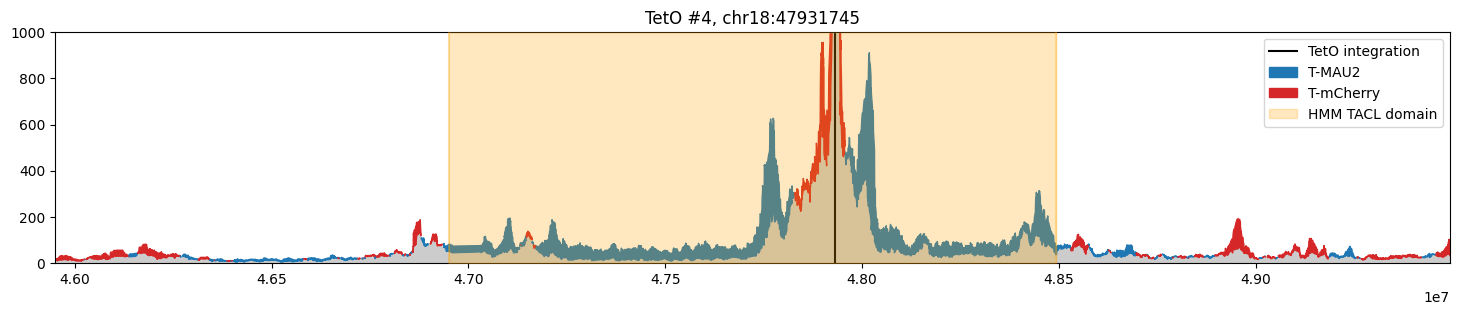

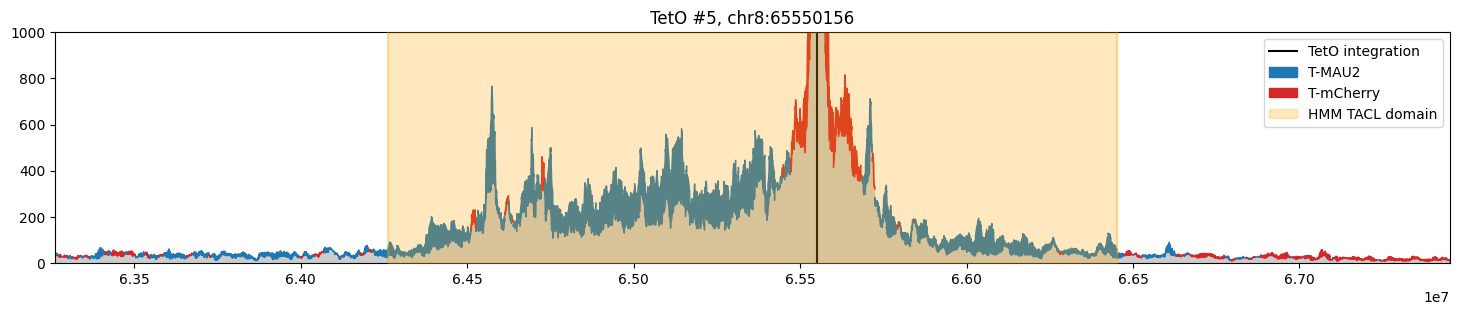

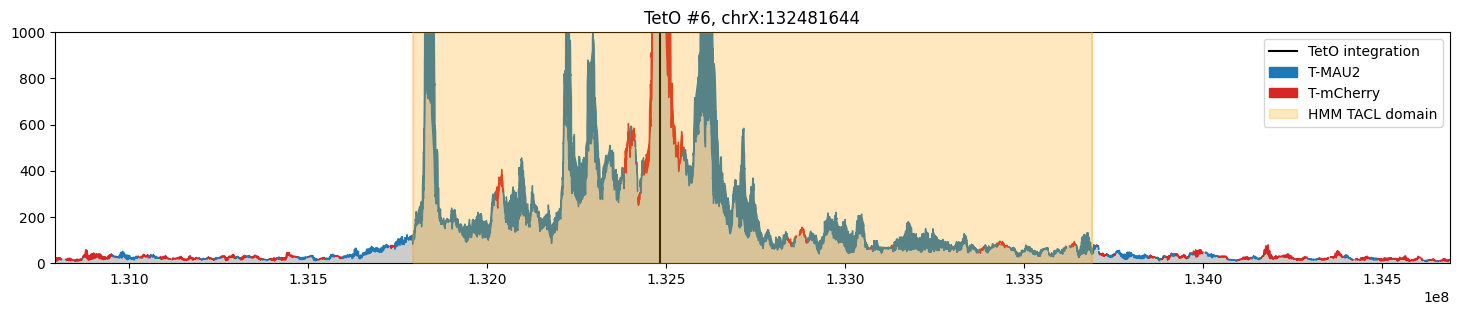

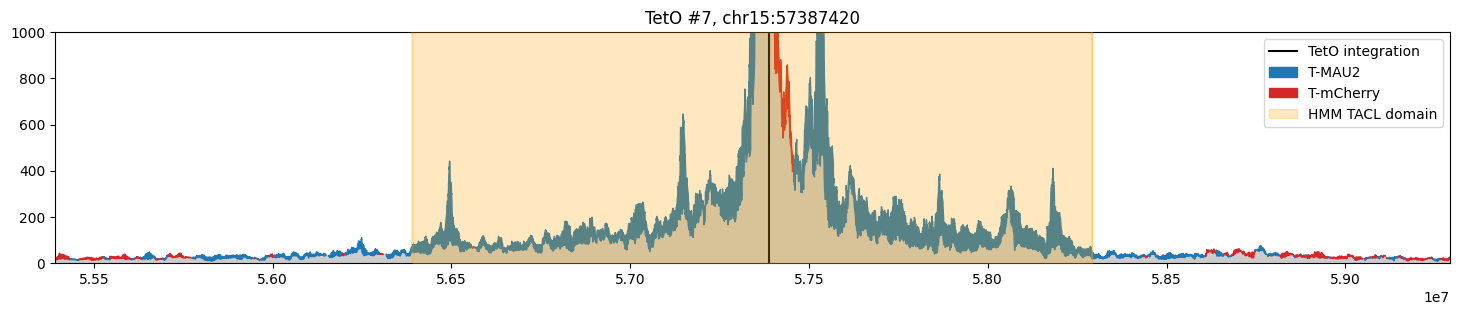

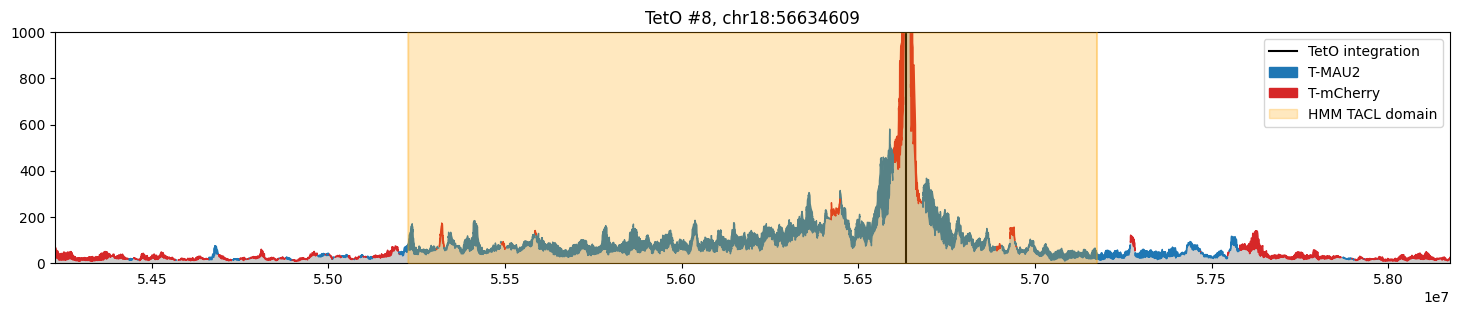

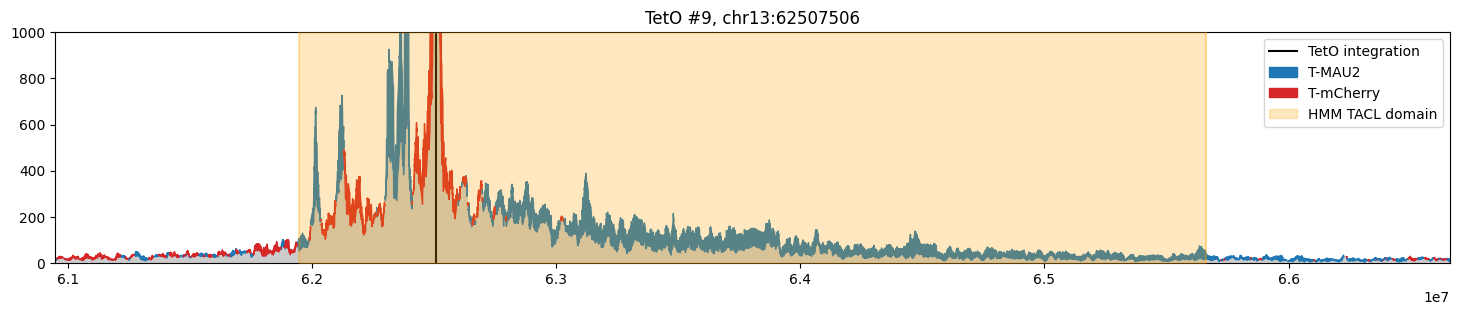

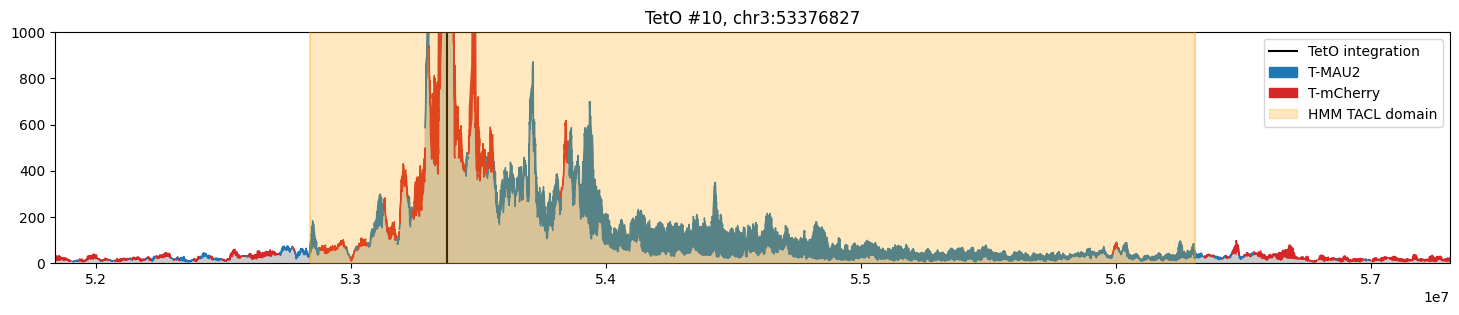

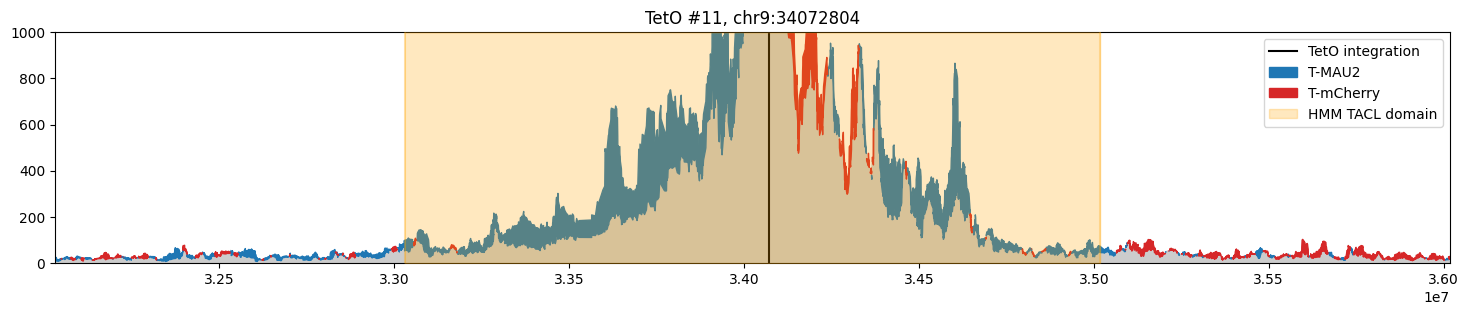

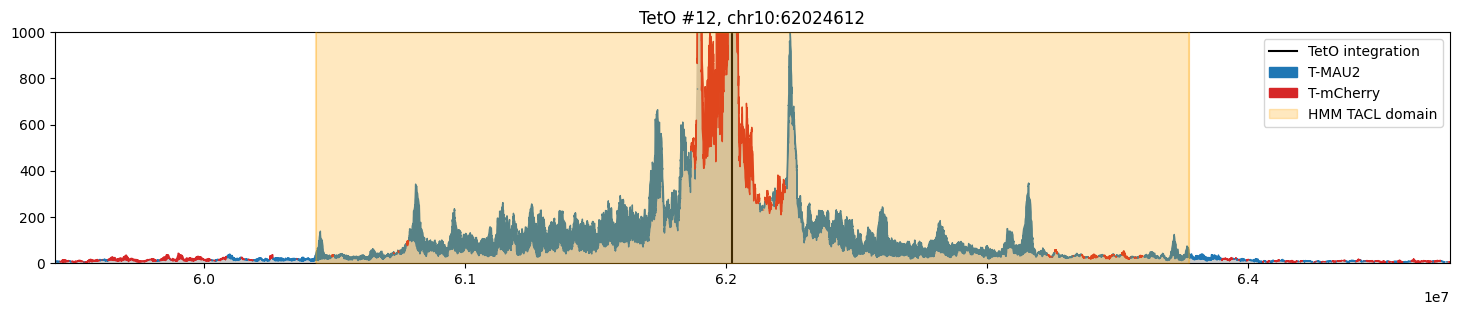

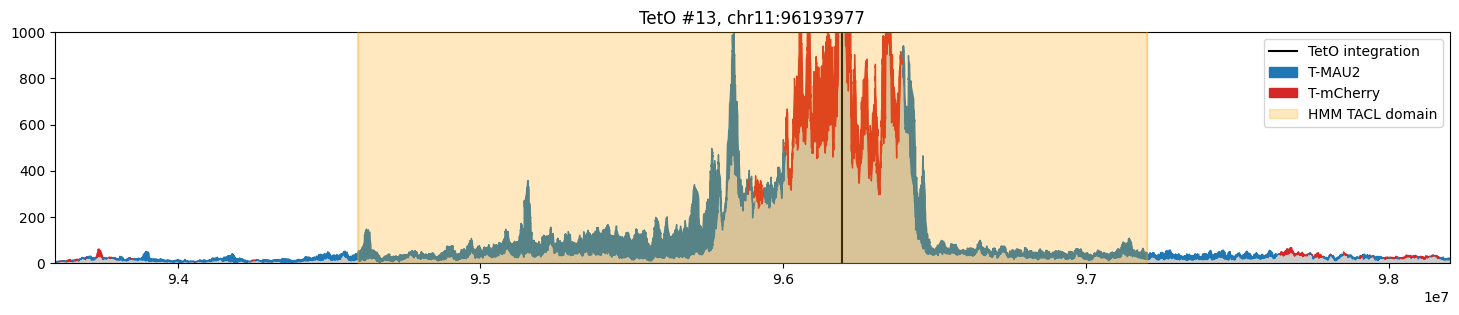

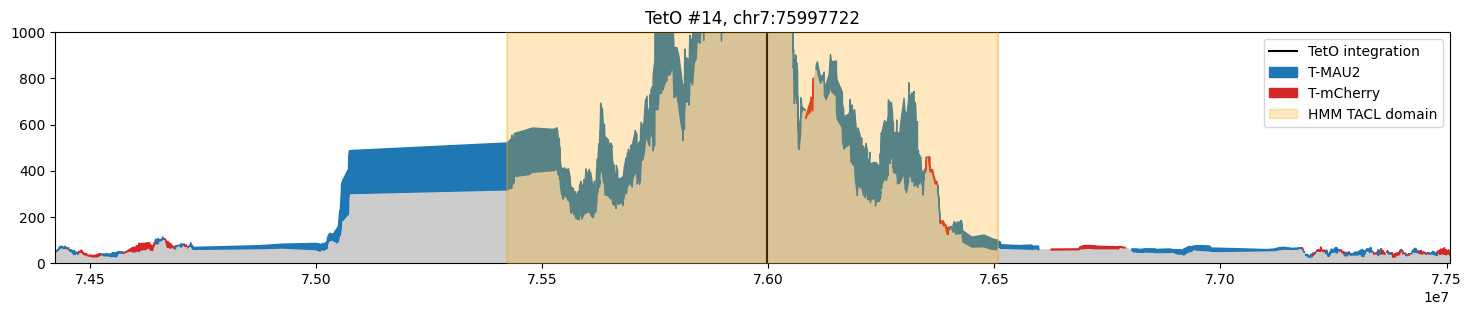

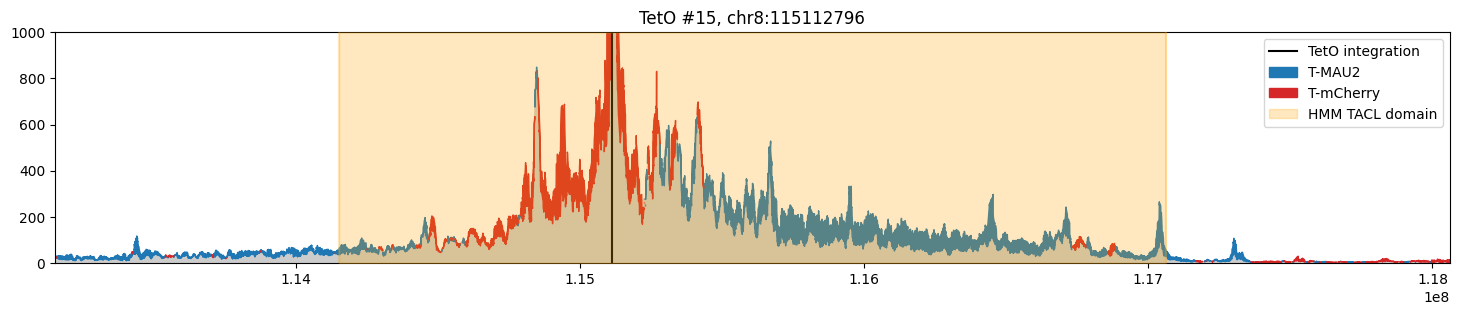

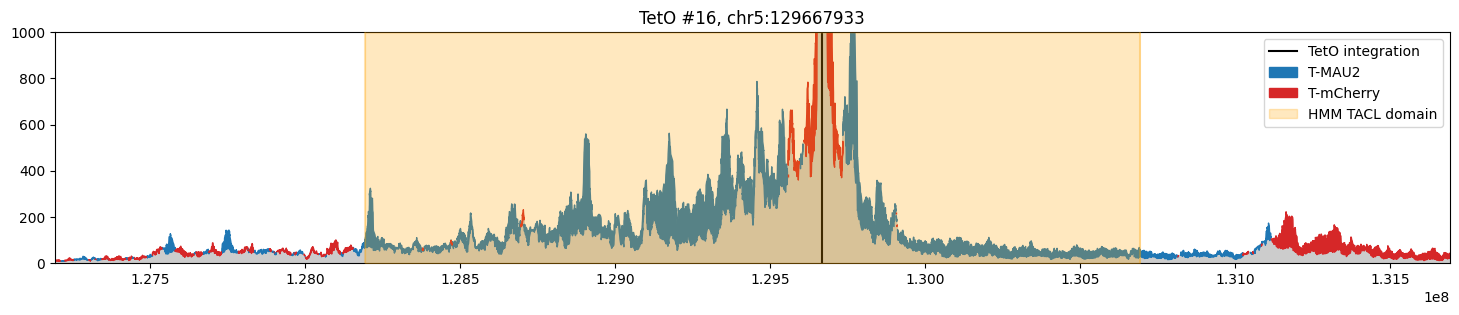

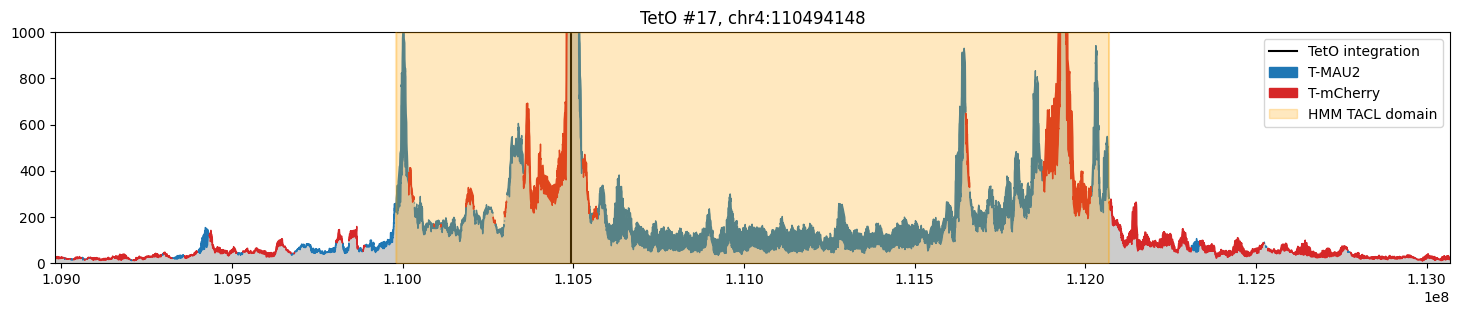

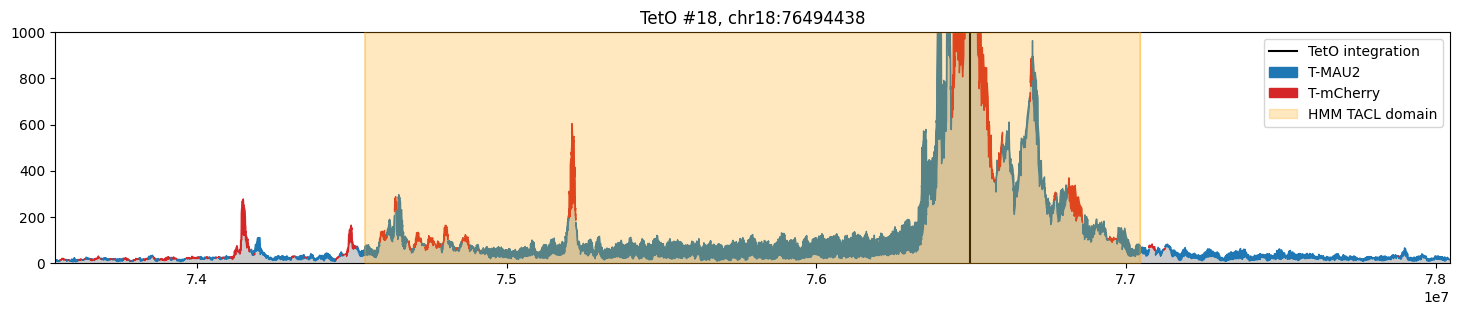

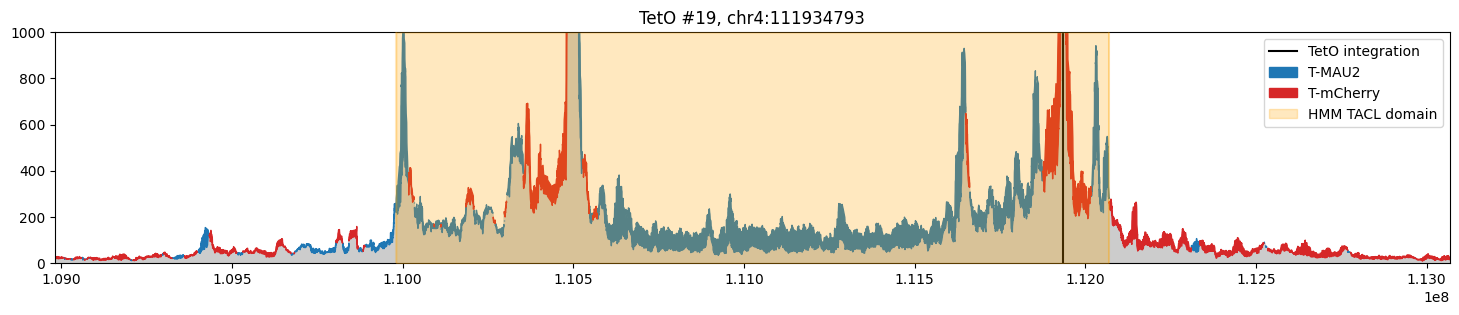

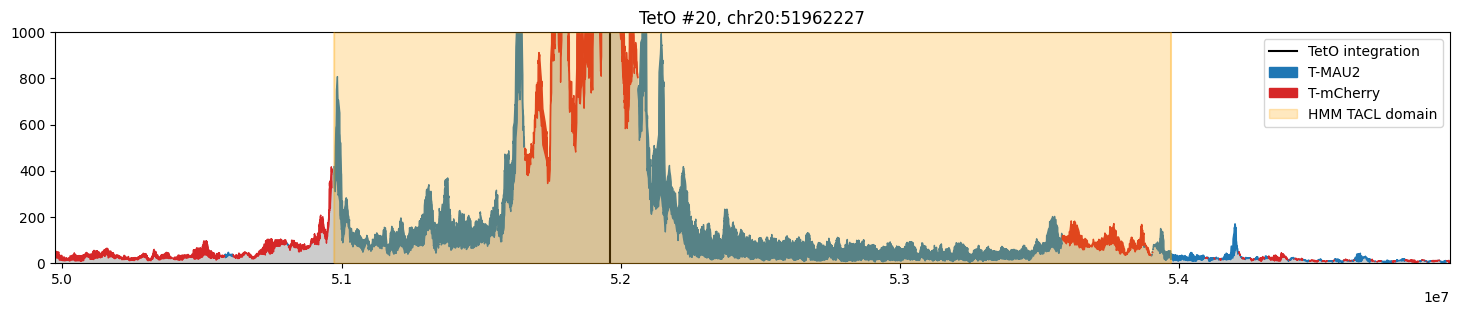

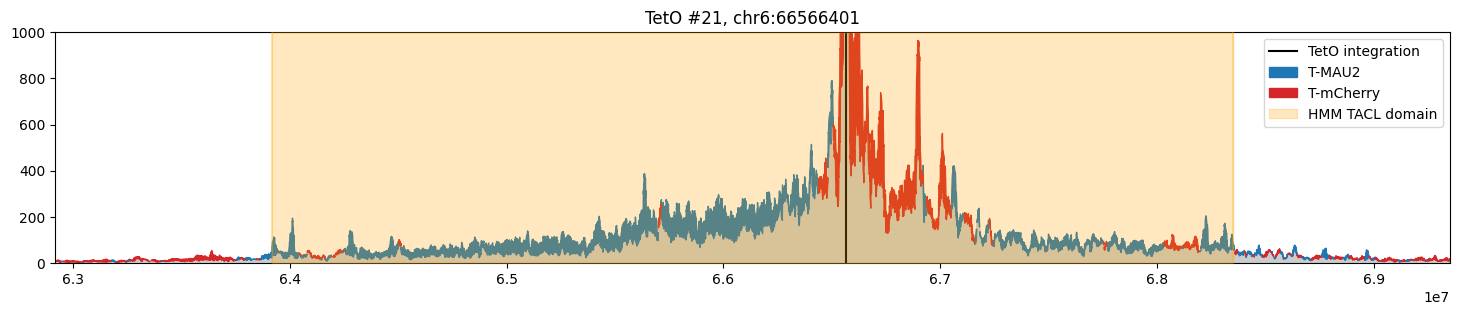

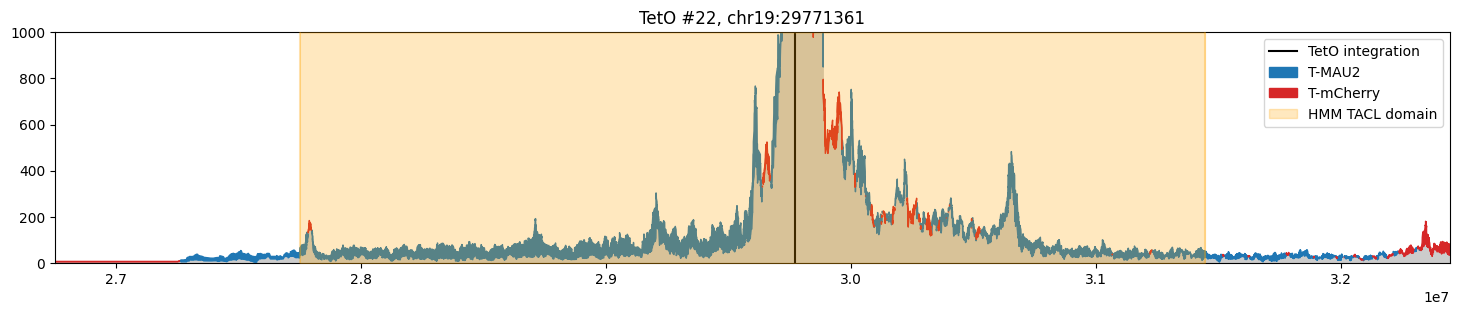

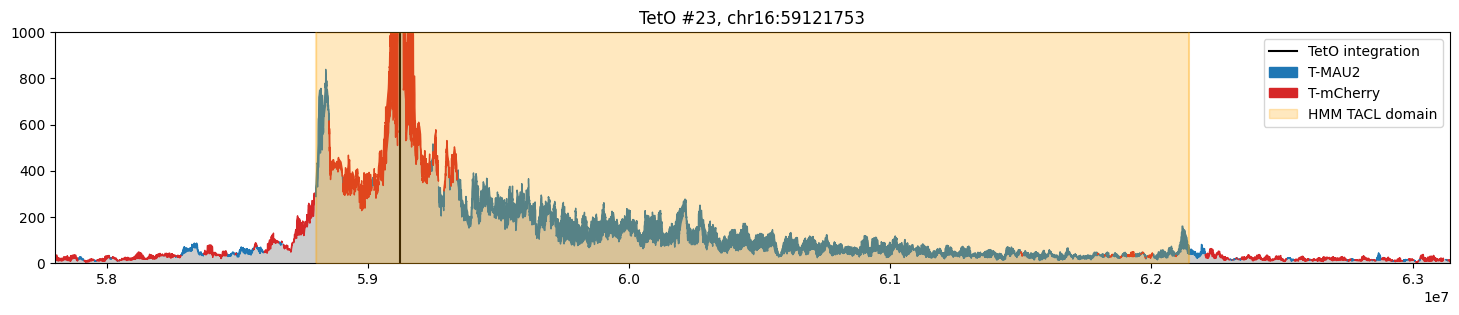

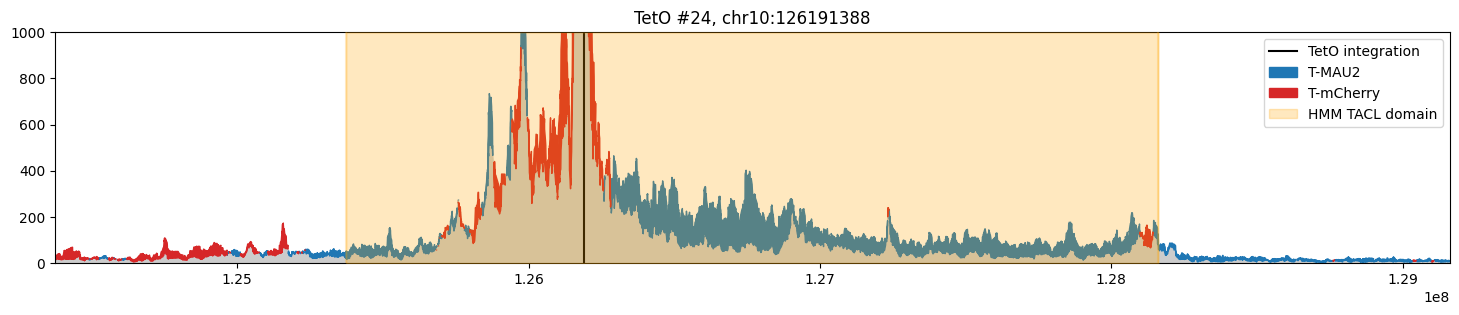

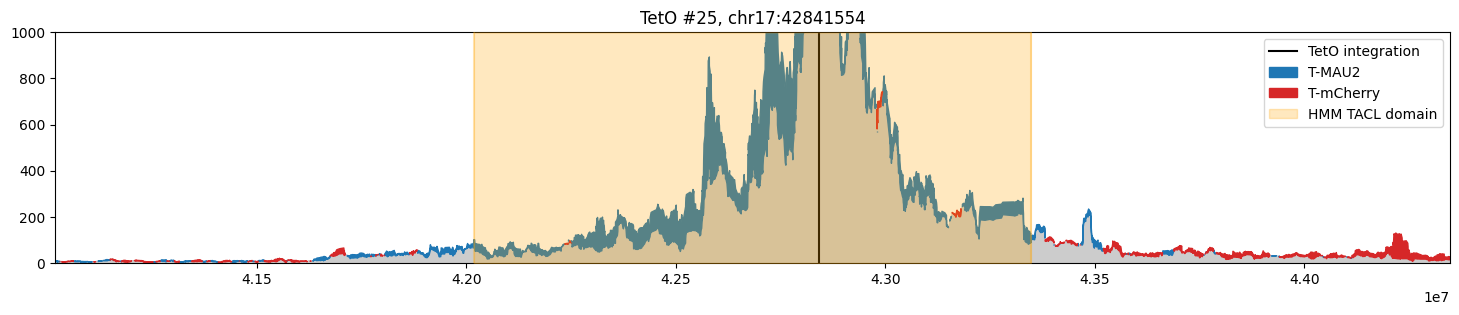

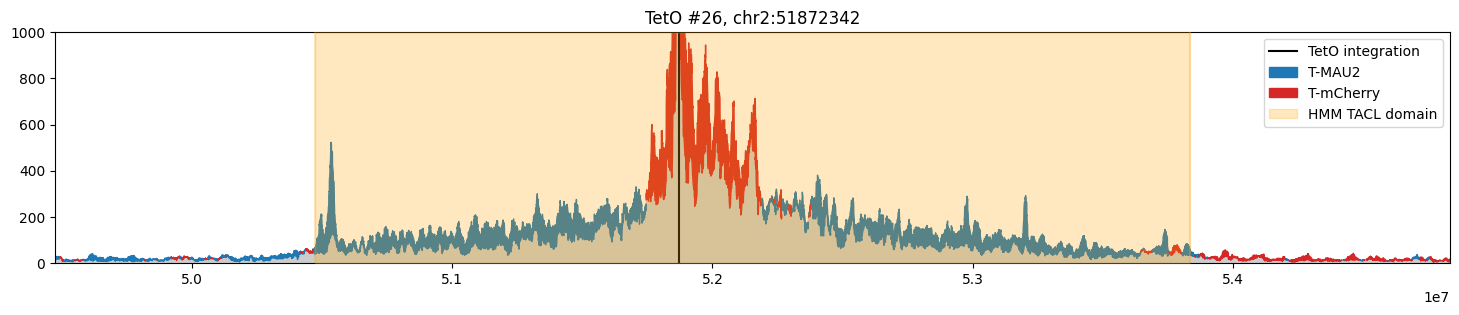

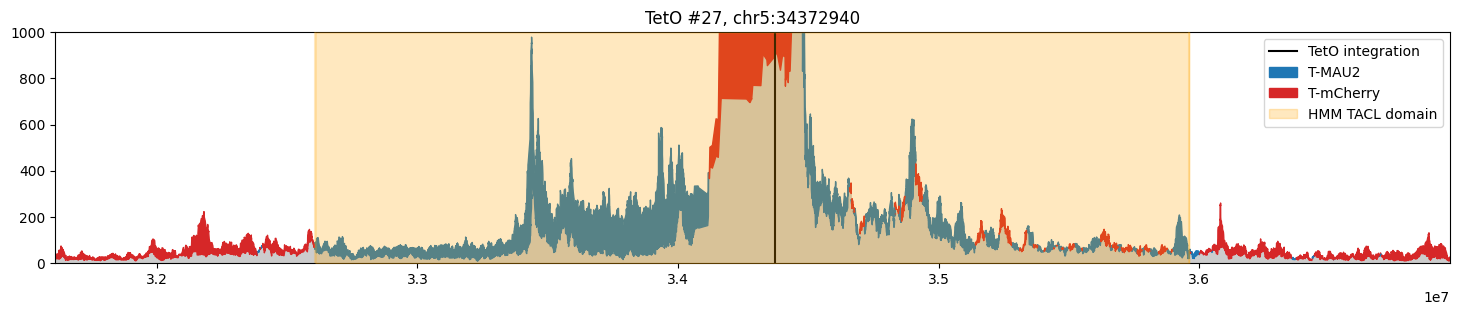

In [22]:
# Plot 4C signals and TACL domains
for viewpoint_id_hmm in range(1, 28):
    plot_tacl_domains(vp_data_merged, viewpoint_id_hmm, teto_coordinates, 1000000)